# Simulation for Library Acquisitions - printed books version.

In [1]:
import random
import numpy as np
import pandas as pd
import math

In [2]:
# This function get hourly labor costs from annual wages. 
# Hourly labor cost is calculated by using annual wages, befefit rate, and paid vacation hours. 
# (ALCTS Technical Services Costs Committee. "Guide to Cost Analysis of Acquisitions and Cataloging in Libraries," ALCTS Newsletter 2. no. 5, 1991: 49-52.)

def labor_costs(annual_work_hour):
    annual_wages = random.randint(50000, 70000)
    benefit_rate = random.uniform(0, 0.3)
    paid_off_hour = random.randint(0, 42)
    average_cost = (annual_wages + (annual_wages * benefit_rate)) / (annual_work_hour - paid_off_hour)
    return round(average_cost, 2)
labor_costs(1950)

44.42

In [3]:
# This function is to get annual maintenance cost from total volumes library houses and hourly labor costs.
# (Elise Calvi, Yvonne Carignan, Liz Dube, and Whitney Pape, The Preservation Manager's Guide to Cost Analysis, Chicago: American Library Association, 2006, 36-37.)
def maintenance_cost(annual_work_hour, total_volume):
    maintenance_labor = labor_costs(annual_work_hour) * 0.04
    volumes_per_box = math.ceil(total_volume / 25)
    maintenance_cost = volumes_per_box * maintenance_labor
    return round(maintenance_cost, 2)
maintenance_cost(1950, 350000)

20552.0

In [4]:
# This function calculates cataloging cost per a book. 
# The function randomly choose a catalog's productivity per day. 
# (Robert H. Burger, Financial Management of Libraries and Information Centers, California and Colorado: Libraries Unlimited, 2017, 249-253.)
def cataloging_cost(annual_work_hour):
    day_cataloging = random.randint(8, 12)
    daily_labor = labor_costs(annual_work_hour) * 8
    cost_per_book = daily_labor / day_cataloging
    return round(cost_per_book, 2)
cataloging_cost(1950)

26.92

In [5]:
# This function generates a list of books that are randomly selected in pages, page thickness, price, and demand level.
def get_book_list(num_of_titles, annual_work_hour):
    cost_per_book = cataloging_cost(annual_work_hour)
    pages = np.random.randint(10, 2000, size=num_of_titles)
    page_thickness = np.random.uniform(0.01, 0.05, size=num_of_titles)
    thickness = np.around(page_thickness * pages, decimals=2)
    page_price = np.random.uniform(0.01, 0.1, size=num_of_titles)
    price = np.around(page_price * pages, decimals=2)
    # Three types of demand indicates 3 is high, 2 medium, and 1 low.
    demand_list = ['1', '2', '3']
    demands = []
    for i in range(num_of_titles):
        demand = random.choice(demand_list)
        demands.append(demand)

    df = pd.DataFrame(data={'Thickness': thickness,
                            'Price': price,
                            'Demands': demands,
                            'cataloging_cost': cost_per_book})
    return df
plan = get_book_list(10000, 1950)
plan

,Thickness,Price,Demands,cataloging_cost
0,52.79,62.25,2,25.14
1,5.57,8.92,2,25.14
2,49.93,130.59,3,25.14
3,25.37,21.62,3,25.14
4,29.24,139.70,1,25.14
5,48.97,99.82,3,25.14
6,24.55,36.17,3,25.14
7,14.67,73.80,3,25.14
8,13.44,33.43,2,25.14
9,12.13,37.71,3,25.14


In [6]:
# This function calculates the percentage of discount that a vendor will offer based on how many books you purchase.
def vendor_discount(num_of_titles):
    if num_of_titles < 100:
        return 0.01
    elif 100 <= num_of_titles < 500:
        return 0.02
    elif num_of_titles >= 500:
        return 0.05

In [7]:
# Now we select from the list we created above.
# We consider both budget and thickness.
# We aggregate price and thickness separately, and we drop all nan value. 
# This is examples how it works.
plan = get_book_list(50, 1950)
budget = 1000
space = 500
select_plan = plan.copy(deep=True)
select_plan['total_cost_per_book'] = select_plan['Price'] + select_plan['cataloging_cost']
print('This is total cost per book include book price itself and cataloging cost.\n\n', select_plan, '\n')
select_plan['cost_accumulate'] = select_plan['total_cost_per_book'].cumsum().where(lambda x: x <= budget)
print('Check price. \n\n', select_plan)
select_plan['Total_thickness'] = select_plan['Thickness'].cumsum().where(lambda x:x <= space)
print('Check thickness\n\n', select_plan)
acquisitions = select_plan.dropna()
acquisitions

This is total cost per book include book price itself and cataloging cost.

     Thickness   Price Demands  cataloging_cost  total_cost_per_book
0       71.46  166.83       3            30.22               197.05
1        7.56    9.78       2            30.22                40.00
2        8.07    4.68       2            30.22                34.90
3       21.42   46.44       1            30.22                76.66
4        8.06    9.49       3            30.22                39.71
5       30.17   24.43       3            30.22                54.65
6       44.95   36.98       2            30.22                67.20
7       12.98   32.22       1            30.22                62.44
8       20.88   49.72       2            30.22                79.94
9       11.99   31.56       2            30.22                61.78
10      37.16  104.09       2            30.22               134.31
11      49.27  102.67       1            30.22               132.89
12      31.99   69.03       1          

,Thickness,Price,Demands,cataloging_cost,total_cost_per_book,cost_accumulate,Total_thickness
0,71.46,166.83,3,30.22,197.05,197.05,71.46
1,7.56,9.78,2,30.22,40.00,237.05,79.02
2,8.07,4.68,2,30.22,34.90,271.95,87.09
3,21.42,46.44,1,30.22,76.66,348.61,108.51
4,8.06,9.49,3,30.22,39.71,388.32,116.57
5,30.17,24.43,3,30.22,54.65,442.97,146.74
6,44.95,36.98,2,30.22,67.20,510.17,191.69
7,12.98,32.22,1,30.22,62.44,572.61,204.67
8,20.88,49.72,2,30.22,79.94,652.55,225.55
9,11.99,31.56,2,30.22,61.78,714.33,237.54


In [8]:
# From the above test, the code is re-written as a function. 
# return a dataFrame which is satisfied with both conditions (budget and thickness)

def select_book(plan, budget, space):
    select_plan = plan.copy(deep=True)
    select_plan['total_cost_per_book'] = select_plan['Price'] + select_plan['cataloging_cost']
    select_plan['cost_accumulate'] = select_plan['total_cost_per_book'].cumsum().where(lambda x: x <= budget)
    select_plan['Total_thickness'] = select_plan['Thickness'].cumsum().where(lambda x:x <= space)
    acquisitions = select_plan.dropna()
    return acquisitions

select_book(plan, 1000000, 1000)

,Thickness,Price,Demands,cataloging_cost,total_cost_per_book,cost_accumulate,Total_thickness
0,71.46,166.83,3,30.22,197.05,197.05,71.46
1,7.56,9.78,2,30.22,40.00,237.05,79.02
2,8.07,4.68,2,30.22,34.90,271.95,87.09
3,21.42,46.44,1,30.22,76.66,348.61,108.51
4,8.06,9.49,3,30.22,39.71,388.32,116.57
5,30.17,24.43,3,30.22,54.65,442.97,146.74
6,44.95,36.98,2,30.22,67.20,510.17,191.69
7,12.98,32.22,1,30.22,62.44,572.61,204.67
8,20.88,49.72,2,30.22,79.94,652.55,225.55
9,11.99,31.56,2,30.22,61.78,714.33,237.54


In [9]:
# This function an MC simulation for acquisitions.
# Here are two strategies to purchase books: users' demands and price.
# In the first strategy, the simulation selects books from high demands to low.
# In the second strategy, the simulation selects books from cheapest books to most expensive books.
# The twoo stragegies select books under the budget and space.
def MonteCarloSimulation(annual_work_hour, total_volume, budget, space, num_of_titles) -> list:
    acquisition_budget = budget - maintenance_cost(annual_work_hour, total_volume)


    plan = get_book_list(num_of_titles, annual_work_hour)


    demand_order = plan.sort_values(by='Demands', ascending=False)
    price_order = plan.sort_values(by='Price', ascending=True)

    demand_acquisition = select_book(demand_order, acquisition_budget, space)
    price_acquisition = select_book(price_order, acquisition_budget, space)

    demand_book = demand_acquisition['Price'].count()
    demand_cost = round(demand_acquisition['total_cost_per_book'].sum() * (1 - vendor_discount(demand_book)), 2)
    demand_thickness = math.ceil(demand_acquisition['Thickness'].sum())

    price_book = price_acquisition['Price'].count()
    price_cost = round(price_acquisition['total_cost_per_book'].sum() * 1 - vendor_discount(price_book), 2)
    price_thickness = math.ceil(price_acquisition['Thickness'].sum())

    sim_data = [demand_book, demand_cost, demand_thickness, price_book, price_cost, price_thickness]

    return sim_data
MonteCarloSimulation(1950, 50000, 1000000000, 10000, 100000)

[355, 27430.54, 9947, 4263, 123899.0, 9997]

In [10]:
# Simulation for 100 times and return Data Frame.
if __name__ == '__main__':


    datas = []
    for i in range(100):
        data = MonteCarloSimulation(1950, 50000, 1000000000, 10000, 100000)
        datas.append(data)
    simulation_result = pd.DataFrame(datas, columns=['num_of_books_by_demand',
                                                     'total_cost_by_demand',
                                                     'total_thickness_by_demand',
                                                     'num_of_books_by_price',
                                                     'total_cost_by_price',
                                                     'total_thickness_by_price'])
simulation_result

,num_of_books_by_demand,total_cost_by_demand,total_thickness_by_demand,num_of_books_by_price,total_cost_by_price,total_thickness_by_price
0,332,29485.77,9961,4244,153162.93,9992
1,300,28837.97,9990,4214,181944.14,9999
2,349,28939.89,9993,4259,128243.92,9993
3,356,30656.54,9949,4166,159001.22,9994
4,344,25007.47,9954,4172,104426.73,9992
5,336,25275.23,9953,4194,117165.15,9998
6,322,26037.70,9996,4342,125998.99,10000
7,324,26955.94,9955,4184,117454.87,10000
8,303,27617.07,9935,4247,152193.78,9988
9,339,27496.00,9999,4214,121888.11,10000


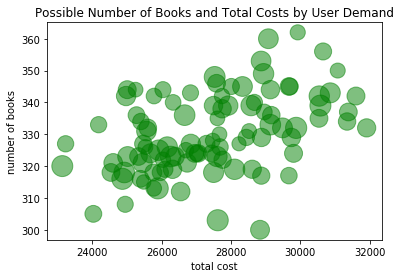

In [16]:
import matplotlib.pyplot as plt


a = simulation_result['total_cost_by_demand']
b = simulation_result['num_of_books_by_demand']
c = simulation_result['total_cost_by_price']
d = simulation_result['num_of_books_by_price']
e = simulation_result['total_thickness_by_demand']
f = simulation_result['total_thickness_by_price']

s = np.random.rand(*a.shape) * 1000 + 800

plt.title("Possible Number of Books and Total Costs by User Demand")
plt.scatter(a, b, s, c="g", alpha=0.5, marker='.',
            label="")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.show()

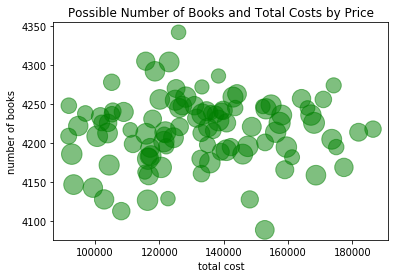

In [12]:
s = np.random.rand(*a.shape) * 1000 + 800

plt.title("Possible Number of Books and Total Costs by Price")
plt.scatter(c, d, s, c="g", alpha=0.5, marker='.',
            label="")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.show()


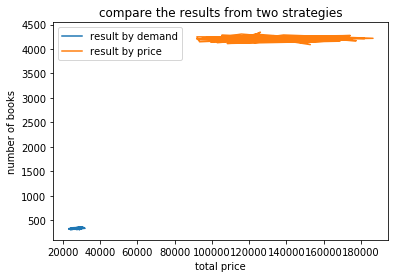

In [13]:
plt.plot(a, b, label='result by demand')
plt.plot(c, d, label='result by price')
plt.xlabel('total price')
plt.ylabel('number of books')

plt.title('compare the results from two strategies')

plt.legend()

plt.show()

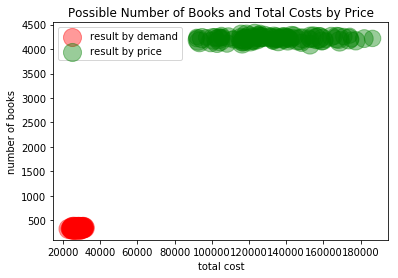

In [14]:
plt.title("Possible Number of Books and Total Costs by Price")
plt.scatter(a, b, s, c="r", alpha=0.4, marker = '.',
            label="result by demand")
plt.scatter(c, d, s, c="g", alpha=0.4, marker = '.',
            label="result by price")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.legend()

plt.show()

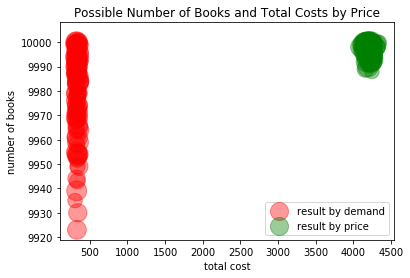

In [15]:
plt.title("Possible Number of Books and Total Costs by Price")
plt.scatter(b, e, s, c="r", alpha=0.4, marker = '.',
            label="result by demand")
plt.scatter(d, f, s, c="g", alpha=0.4, marker = '.',
            label="result by price")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.legend()

plt.show()

# Conclusion
## The number of books a library can purchase based on users' demands (high population) may be less than the number of books purchased based on books' prices. 